##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Cardio Good Fitness
##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> New Customer Targeting
###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Exploratory Data Analysis

    Brian Hall
    DSBA - Project 1
    03-25-2021
    
<font color=darkblue>
&nbsp;
    
Data has been provided via CSV (CardioGoodFitness.csv | 7.28k)

The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

The data contains:
    
    - 180 rows and 9 columns
    - No missing data & no duplicate rows
    - Column Keys match data description provided
    - 6 numerical attributes of type int64
    - 3 Categorical attributes of type object

Customer age groups will be generated and added to the DataFrame as "Age Group" with  bins = [1,12,19,30,64, np.inf]
    
Miles - No time period has been given for expected miles to run - observations range from 21 to 360 with many high outliers.


## Customer Overview
180 observations:
- Young Adult (age 20 - 30) - 64%
- Adult (age 30 - 64) -       33% 
- Teen - (age 13 - 19) -      2%
- Older Adult (age 65+) -     0%


   - The mean age is 29 with a range of 18 to 50 primarily consisting of Young Adults & Adults 
   
   - 57% are Males, 43% are Females
   
   - 68% are partnered
   
   - Average income is 53,719 with a min 29,562 and max 104,581
   
   - 47% of customers have at least a 4 year degree, 31% have at least 2 years of post secondary & 15% of customers have higher than a 4 year degree
   
   - Nearly 54% of users rate their fitness at a 3 (scale 1-5) and 32% of users rate as a 4 or 5
   
   - 66% of customers want to use the product 3 to 4 times a week, 18% want to use 2 times a week 
   
   - All customers with an income > 70,000 report a usage of 4 and above 
   
   - The vast majority of customers with an income > 70,000 report a fitness of 4 or 5
   
   - Income increases by about 20% for partnered customers starting about 45,000
   
   - High correlations for Fitness, usage & Miles - 0.76 - 0.79
   
   - Mild correlations for Income, Miles, Fitness & Usage - 0.5
   
   - Very low correlation for Age, Miles, Fitness & Usage - 0.015 to 0.03
   


## Customer Profiles by Product


- TM198 - Educated Young Adults & Adults, entry level product
-- Young Adults account for about 63% of all sales
-- Customer gender is roughly even
-- There are roughly 25% more partnered customers
-- 51% of customers have 16+ years of education and 38% have 14
-- Average income of customers is 46,400
-- Young Adult income distribution between 30,000 & 60,000
-- Adult income distribution primarily between 40,000 & 70,000
-- Those who purchase the TM195 report a mid level of fitness
-- Customers want to primarily use the TM195 2 - 4 days a week with 46% at 3 days


- TM498 - Educated Young Adults & Adults, mid-level product
-- Young Adults account for 57% of all sales and Adults 42%
-- Customers gender is roughly even
-- There are roughly 25% more partnered customers
-- 95% of customer have 14+ years of education, with 55% having 16+ years
-- Average income of customers is $49,000
-- Young Adult income distribution primarily between 30,000 and 60,000
-- Adult income distribution primarily between 45,000 & 70,000
-- Those who purchase the TM498 report a mid level of fitness
-- Customers want to primarily use the TM498 2 - 4 days a week with 52% at 3 days


- TM798 - Highly educated young adult & adult male fitness enthuasists
-- Young Adults account for about 75% of all sales
-- Males account for 80% of all sales
-- All customers have 14+ years of education, with 58% having 18+ years
-- Average income of customers is 75,500
-- Young Adult customers have fairly evenly distributed incomes
-- All Adult customers make 80,000 and above
-- Those who purchase the 798 all report high fitness, mostly 5
-- 92% of customers want to use the 798 4+ times a week
-- Speculation - 798 additional features may primarily be attractive to fitness enthuasists
-- Speculation - 798 customers may purchase for status & perception of quality



### Product Notes
 
 TM195 - Has 44% of sales and is primarily purchased by customers with 30,000 to 60,000 income with low to mid level fitness
  
 TM498 - has 33% of sales with most of it's purchases by customers with incomes in the 40,000 to 70,000 range with mid level fitness
 
 TM798 - while this model has sales across most incomes and high level fitness, it accounts for 22% of all sales
       and is the only model that has higher income customers, starting around 70,000
 
 
 TM195 and TM498 have a significant overlap for customers with incomes in the 30,000 to 70,000 range 


### Recommendations
(assumptions - The higher the model number the higher the price, feature sets & profit. - Retail locatoin with substantial population bsae or existing / desire to sell online)


- Increase marketing for TM798 to adult males with > 50,000 income - Message - status & "better fitness" features
-- Goal is to increase the attention of a wider income range of adult fitness enthuasists 
-- Goal is to increase the attention of more adults with mid level fitness to "better features", etc.

- Increase marketing for TM498 to partnered young adults with > 50,000 income and possibly newer home owners - Message - long lasting, mid-range product for the family
-- Goal is to increase the attention of Young Adults with mid level and above income

- Increase marketing for TM195 to adults with < 45,000 income - Message - less expensive option to get or stay fit
-- Goal is to increase the attention of lower income adults

# Additional Data Recommendation
Obtaining additional data corresponding to the customers would significantly increase the insights needed to accurately analyze and recommend marketing, production, design & feature needs.
- Potential Data to acquire
-- Primary user surveys
-- Actual usage metrics
-- Rent vs Own (home)
-- Student vs Full Time
-- Geo-spatial data
-- Product specifications & features
-- Existing marketing campaigns and outcomes
-- Competative product data & usage


### Load libraries and data

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
cardioDF = pd.read_csv('CardioGoodFitness.csv')

In [3]:
cardioDF.head(5)
#Data has loaded correctly

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

### Verify & Clean Data

In [4]:
# -- Check for missing data
def findNulls(df):
    numOfNulls = df.isnull().sum().sort_values(ascending=False)
    percentOfNulls = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missingData = pd.concat([numOfNulls, percentOfNulls], axis=1, keys=['numOfNulls', 'percentOfNulls'])
    return missingData
print(findNulls(cardioDF))

# -- Check for duplicate rows
print('')
print('Duplicte Rows:', cardioDF.duplicated(subset=None, keep='first').sum())

               numOfNulls  percentOfNulls
Miles                   0             0.0
Income                  0             0.0
Fitness                 0             0.0
Usage                   0             0.0
MaritalStatus           0             0.0
Education               0             0.0
Gender                  0             0.0
Age                     0             0.0
Product                 0             0.0

Duplicte Rows: 0


### No apparent missing Data
### No need to clean data due to missing observations
### No duplicate rows found

In [5]:
# -- Examine dataframe and 
# -- Check data types that may need to be converted
print(cardioDF.head(2))
print('')
print(cardioDF.shape)
print('')
print(cardioDF.columns)
print('')
print(cardioDF.dtypes)
print('')
print(cardioDF.dtypes.value_counts())
print(type(cardioDF))

  Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18   Male         14        Single      3        4   29562    112
1   TM195   19   Male         15        Single      2        3   31836     75

(180, 9)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

int64     6
object    3
dtype: int64
<class 'pandas.core.frame.DataFrame'>


## Data contains
###    180 rows & 9 columns
###   Column Keys match data description provided
###    6 numerical attributes of type int64
###    3 Categorical attributes of type object
### Currently there is no apparent need to convert any of the data types
### Customer age groups will be generated and added to the data frame as "Age Group" with  bins = [1,12,19,30,64, np.inf]

In [6]:
cardioDF.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

In [7]:
# -- Get overview of the data
cardioDF.describe(include="all")

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      TM195         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

### Uni-Variate Analysis

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age'>

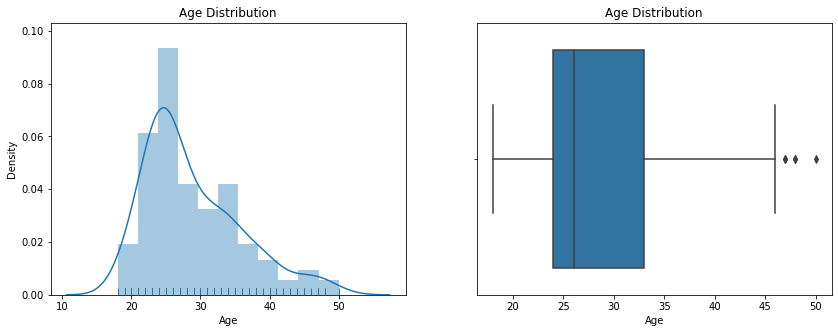

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Age Distribution")
ax[0].set_title("Age Distribution")
sns.distplot(cardioDF.Age, rug=True, ax=ax[0])
sns.boxplot(cardioDF.Age, ax=ax[1])

### Create customer age categories
bins = [1,12,19,30,64, np.inf]


Young Adults    115
Adults           60
Teens             5
Older Adults      0
Children          0
Name: Age Group, dtype: int64

Young Adults    63.888889
Adults          33.333333
Teens            2.777778
Older Adults     0.000000
Children         0.000000
Name: Age Group, dtype: float64


<AxesSubplot:title={'center':'Age Group Distribution'}, xlabel='Age Group', ylabel='Density'>

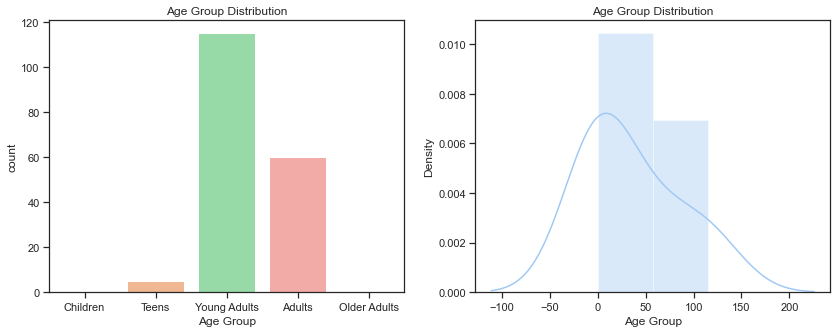

In [9]:
cardioDF['Age Group'] = pd.cut(x=cardioDF['Age'], bins = [1,12,19,30,64, np.inf], labels = ['Children', 'Teens', 'Young Adults', 'Adults', 'Older Adults'])
agPercent = cardioDF['Age Group'].value_counts(lambda x: x / float(x.sum()))
print(cardioDF['Age Group'].value_counts())
print('')
print(agPercent * 100)
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Age Group Distribution")
ax[0].set_title("Age Group Distribution")
sns.countplot(x='Age Group', data=cardioDF, ax=ax[0])
sns.distplot(cardioDF['Age Group'].value_counts(), ax=ax[1])



### Age Group Observations
* Young Adults    63.88%
* Adults          33.33%
* Teens            2.77%
* Older Adults     0.00%
 Children         0.00%

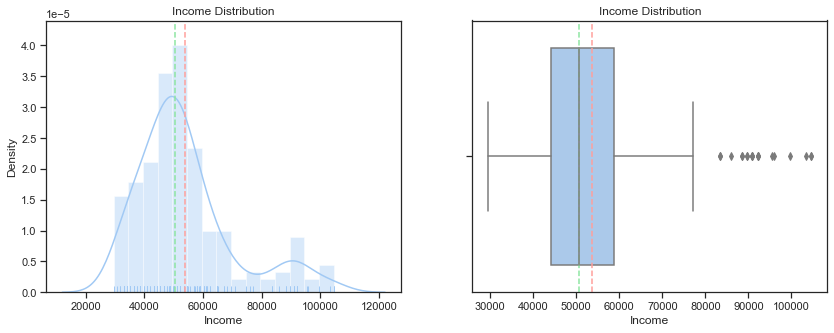

In [10]:
# Income distribution
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Income Distribution")
ax[0].set_title("Income Distribution")
sns.boxplot(cardioDF.Income, ax=ax[1])
sns.distplot(cardioDF.Income, rug=True, ax=ax[0])

ax[0].axvline(np.mean(cardioDF.Income), color='r', linestyle='--') 
ax[1].axvline(np.mean(cardioDF.Income), color='r', linestyle='--')
ax[0].axvline(np.median(cardioDF.Income), color='g', linestyle='--') 
ax[1].axvline(np.median(cardioDF.Income), color='g', linestyle='--')


### Income Observations
* Majority of income is between 45k & 60k
* Skewed right with several outliers above 80K

In [11]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

Male      104
Female     76
Name: Gender, dtype: int64
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64


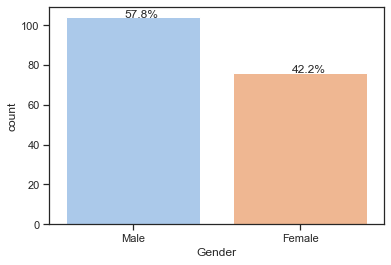

In [12]:
# Gender
genderCounts = cardioDF.Gender.value_counts()
genderPercent = cardioDF['Gender'].value_counts(lambda x: x / float(x.sum()))
print(genderCounts)
print(genderPercent * 100)
ax = sns.countplot(x = 'Gender', data=cardioDF)
bar_perc(ax,cardioDF['Gender'])

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Percent of Partnered: 68.22429906542055


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

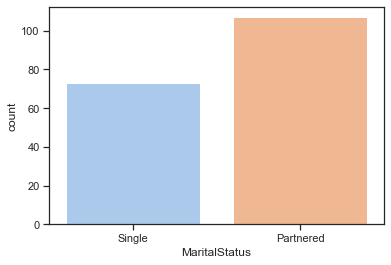

In [13]:
# Married Status
marriedCounts = cardioDF.MaritalStatus.value_counts()
marriedPercent = (marriedCounts.values[1] / marriedCounts.values[0]) * 100
print(marriedCounts)
print('')
print('Percent of Partnered:', marriedPercent)
sns.countplot(x ='MaritalStatus', data = cardioDF)


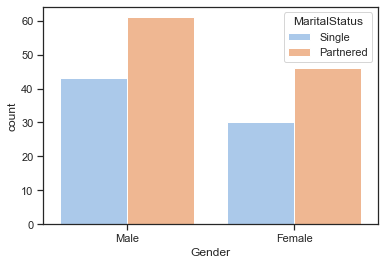

In [14]:
# gender with married status
ax = sns.countplot(x = 'Gender', hue = "MaritalStatus", data=cardioDF)


[14 15 12 13 16 18 20 21]
16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
21     1.666667
12     1.666667
20     0.555556
Name: Education, dtype: float64
16.125


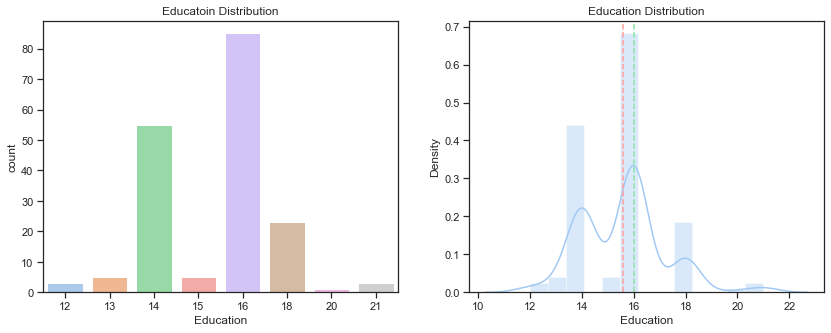

In [15]:
# Education
print(cardioDF.Education.unique())
eduPercent = cardioDF.Education.value_counts(lambda x: x / float(x.sum()))
print(eduPercent * 100)
print(cardioDF.Education.unique().mean())
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Education Distribution")
ax[0].set_title("Educatoin Distribution")
sns.countplot(cardioDF.Education, ax=ax[0])
sns.distplot(cardioDF.Education, ax=ax[1])
ax[1].axvline(np.mean(cardioDF.Education), color='r', linestyle='--')
ax[1].axvline(np.median(cardioDF.Education), color='g', linestyle='--')

### Education Observations
* Mean Education is 16.125 years
* 47% of customers have at least a 16 years of education
* 31% of customers have at least 14 years of education
* 15% of customers have more than 18 years of education

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
3    53.888889
5    17.222222
2    14.444444
4    13.333333
1     1.111111
Name: Fitness, dtype: float64


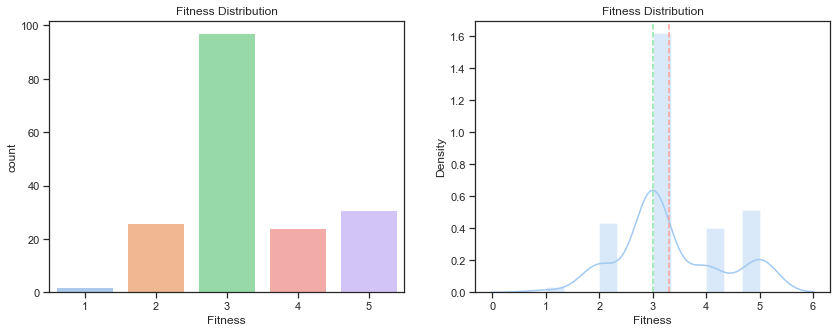

In [16]:
# Fitness
print(cardioDF.Fitness.value_counts())
fitPercent = cardioDF.Fitness.value_counts(lambda x: x / float(x.sum()))
print(fitPercent * 100)
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Fitness Distribution")
ax[0].set_title("Fitness Distribution")
sns.countplot(cardioDF.Fitness, ax=ax[0])
sns.distplot(cardioDF.Fitness, ax=ax[1])
ax[1].axvline(np.mean(cardioDF.Fitness), color='r', linestyle='--')
ax[1].axvline(np.median(cardioDF.Fitness), color='g', linestyle='--')

### Fitness Observations
*  Nearly 54% of users rate their fitness at a 3 (scale 1-5)
*  32% of users rate as a 4 or 5
*  Majority of users possibly want to increase their fitness - (further explore who is in 1 & 2)
*  Explore who is in 4 & 5 for potential customer patterns

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64


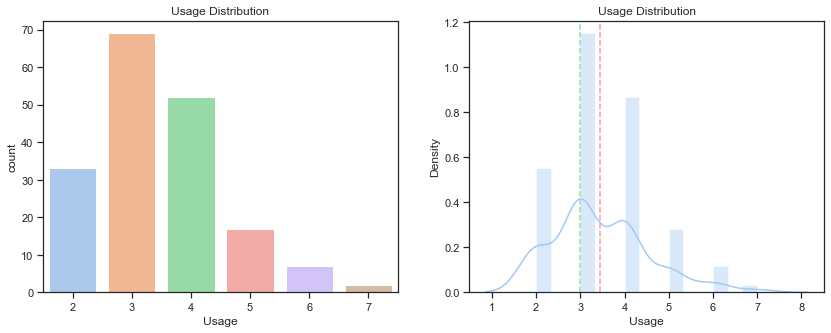

In [17]:
#Usage
print(cardioDF.Usage.value_counts())
usagePercent = cardioDF.Usage.value_counts(lambda x: x / float(x.sum()))
print(usagePercent * 100)
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Usage Distribution")
ax[0].set_title("Usage Distribution")
sns.countplot(cardioDF.Usage, ax=ax[0])
sns.distplot(cardioDF.Usage, ax=ax[1])
ax[1].axvline(np.mean(cardioDF.Usage), color='r', linestyle='--')
ax[1].axvline(np.median(cardioDF.Usage), color='g', linestyle='--')


### Usage Observations
* Usage is a self-reported attribute
* Usage is fairly right skewed
* Majority of customers 66% wants to use the product 3 to 4 times a week
* 18% want to use 2 times a week 

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: Product, dtype: float64


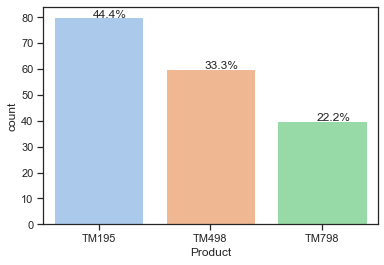

In [18]:
# Product
print(cardioDF.Product.value_counts())
prodPercent = cardioDF.Product.value_counts(lambda x: x / float(x.sum()))
print(prodPercent * 100)
ax = sns.countplot(cardioDF.Product)
bar_perc(ax,cardioDF['Product'])

### Product Observations
* TM195 has the hightest sales at 44.4%
* TM498 accounts for 33.3% of sales
* TM798 accounts for 22.2% of sales

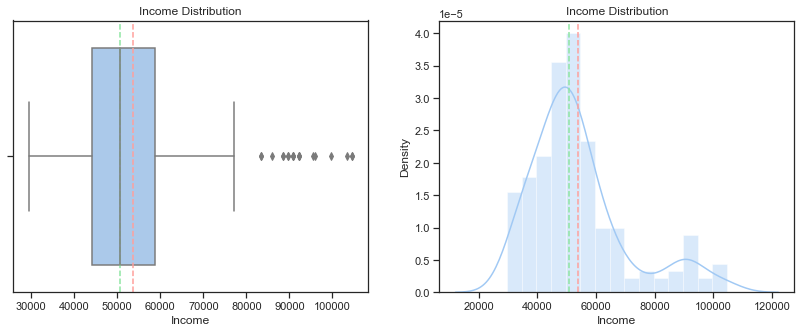

In [19]:
# Income
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Income Distribution")
ax[0].set_title("Income Distribution")
sns.boxplot(cardioDF.Income, ax=ax[0])
sns.distplot(cardioDF.Income, ax=ax[1])
ax[1].axvline(np.mean(cardioDF.Income), color='r', linestyle='--')
ax[1].axvline(np.median(cardioDF.Income), color='g', linestyle='--')
ax[0].axvline(np.mean(cardioDF.Income), color='r', linestyle='--')
ax[0].axvline(np.median(cardioDF.Income), color='g', linestyle='--')


### Income Observations

* Many extreme outliers 
* Fairly skewed to the right
* Average income is 53,719 with a min 29,562 and max 104,581

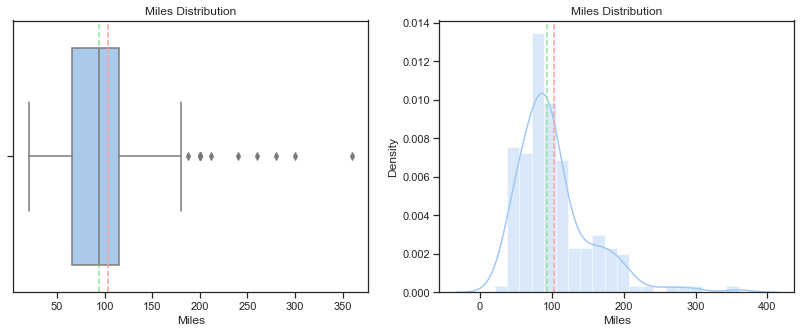

In [20]:
# Miles
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Miles Distribution")
ax[0].set_title("Miles Distribution")
sns.boxplot(cardioDF.Miles, ax=ax[0])
sns.distplot(cardioDF.Miles, ax=ax[1])
ax[1].axvline(np.mean(cardioDF.Miles), color='r', linestyle='--')
ax[1].axvline(np.median(cardioDF.Miles), color='g', linestyle='--')
ax[0].axvline(np.mean(cardioDF.Miles), color='r', linestyle='--')
ax[0].axvline(np.median(cardioDF.Miles), color='g', linestyle='--')

### Miles Observations
* mean: 103, min: 21, max 360, std: 52
* several extreme outliers 
* Highly skewed to the right

### Multi-Variate Analysis

In [21]:
cardioDF.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   TM195   18    Male         14        Single      3        4   29562   
1   TM195   19    Male         15        Single      2        3   31836   
2   TM195   19  Female         14     Partnered      4        3   30699   
3   TM195   19    Male         12        Single      3        3   32973   
4   TM195   20    Male         13     Partnered      4        2   35247   

   Miles     Age Group  
0    112         Teens  
1     75         Teens  
2     66         Teens  
3     85         Teens  
4     47  Young Adults

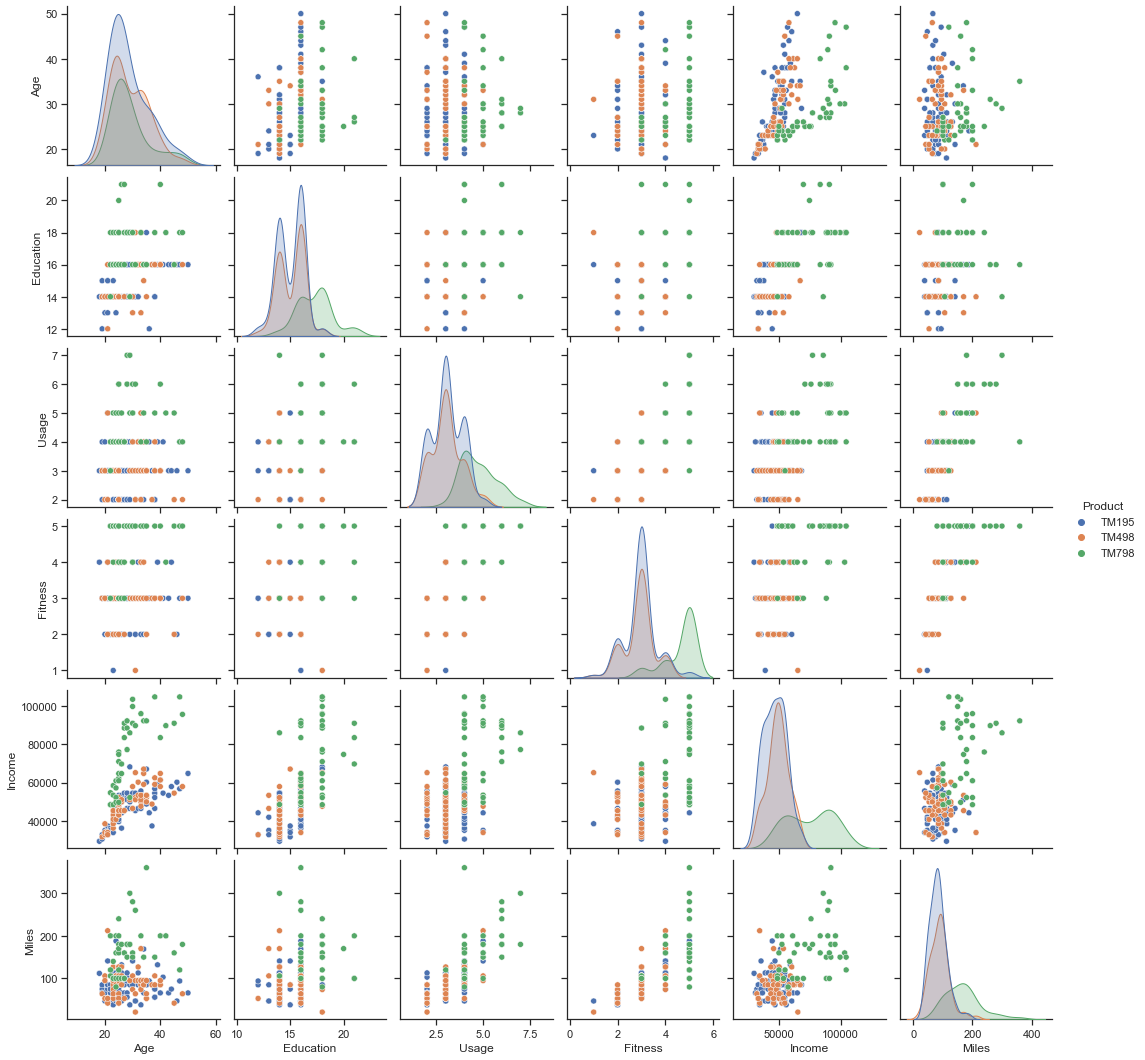

In [22]:
# Pairplot for quick correlation overview
sns.set_theme(style="ticks")
sns.pairplot(cardioDF, hue = 'Product')

<AxesSubplot:>

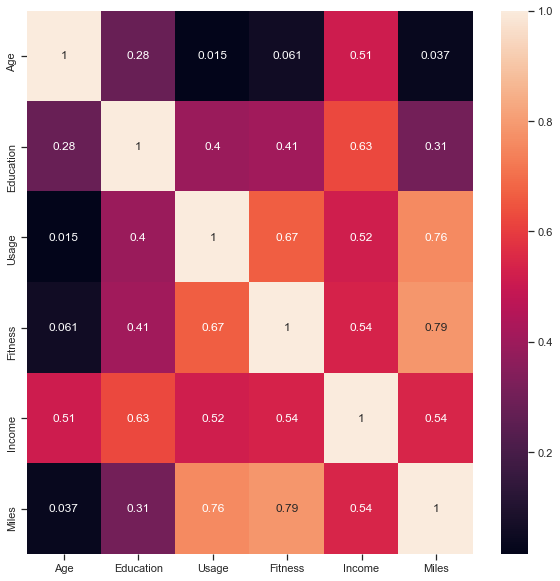

In [23]:
# Heatmap for quick correlation overview
plt.figure(figsize=(10,10))
sns.heatmap(cardioDF.corr(), annot=True) 

### Correlations to potentially explore

- Highest correlations are between Fitness, Usage & Miles - 0.67 to 0.79 

- Moderate correlations for Income & Education - 0.63

- Moderate correlation for age & income – 0.51

- Mild correlations for Income, Miles, Fitness & Usage - 0.5

-  Very little correlation for Age, Miles, Fitness & Usage - 0.015 to 0.037

<AxesSubplot:xlabel='Income', ylabel='Gender'>

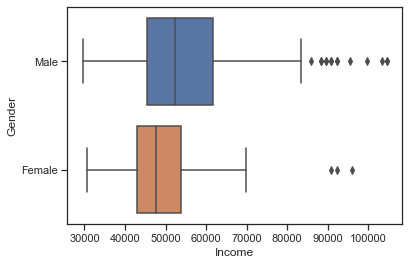

In [24]:
# Gender by income
sns.boxplot(x='Income', y='Gender', data=cardioDF)


### Male customers have a higher average income and a greater number of higher income outliers

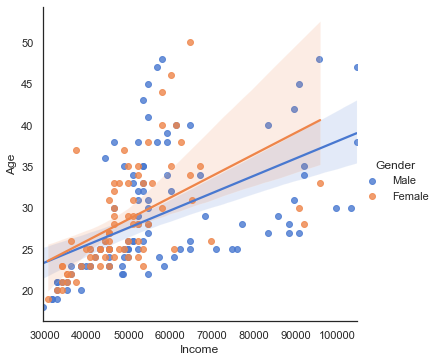

In [25]:
# Age by income
sns.set_theme(style="white")
sns.lmplot(x='Income', y='Age', hue='Gender', palette="muted", data=cardioDF)


<AxesSubplot:xlabel='Age', ylabel='Income'>

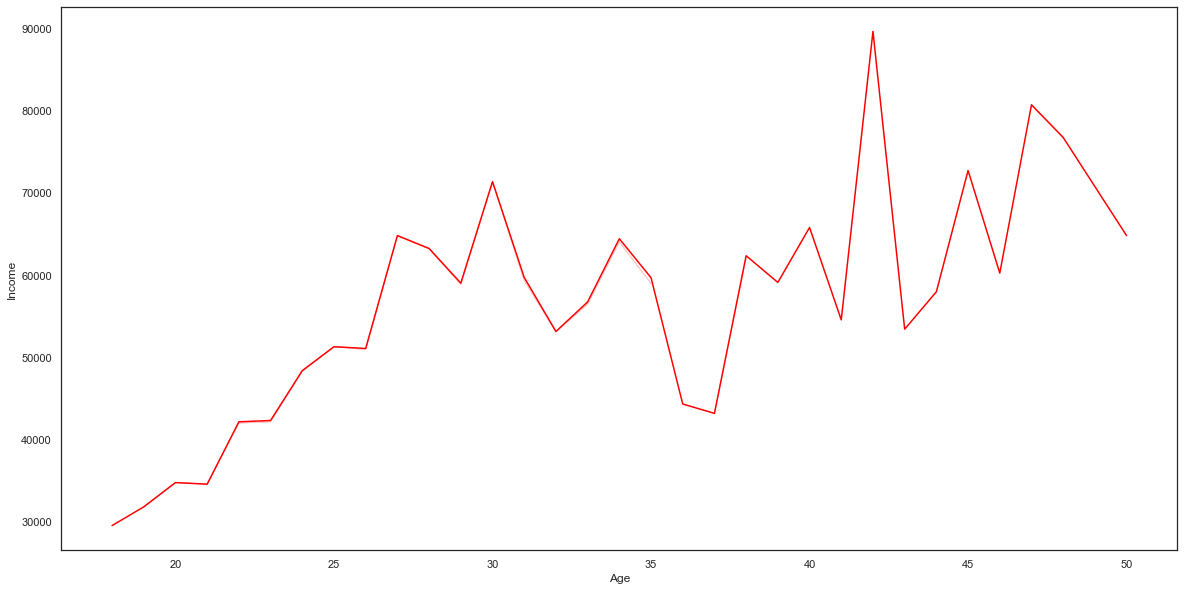

In [26]:
# Age by income
plt.figure(figsize=(20,10))
sns.lineplot(x="Age", y="Income",ci=0,data=cardioDF,color="RED")

### As would be expected there is a Moderate correlation for income and age (0.5)

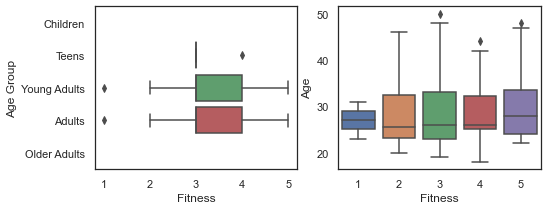

In [27]:
#Fitness by Age Group & Age
fig, ax =plt.subplots(1,2, figsize= (8,3))
sns.boxplot(x="Fitness", y="Age Group", data=cardioDF, ax=ax[0])
sns.boxplot(x="Fitness", y="Age", data=cardioDF, ax=ax[1])
fig.show()

<AxesSubplot:xlabel='Income', ylabel='Usage'>

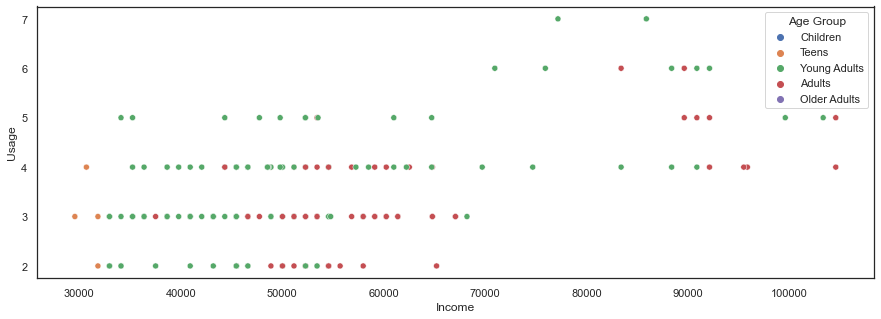

In [28]:
# Usage by income with Age Gruop hue
plt.figure(figsize=(15,5))
sns.scatterplot(x='Income', y='Usage', hue='Age Group', data=cardioDF)



<AxesSubplot:xlabel='Income', ylabel='Usage'>

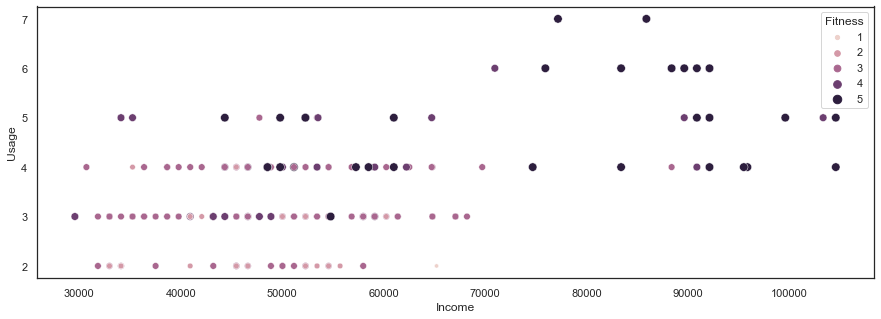

In [29]:
# Usage by income with Fitness hue and size
plt.figure(figsize=(15,5))
sns.scatterplot(x='Income', y='Usage', hue='Fitness', size='Fitness', data=cardioDF)

<AxesSubplot:xlabel='Income', ylabel='Usage'>

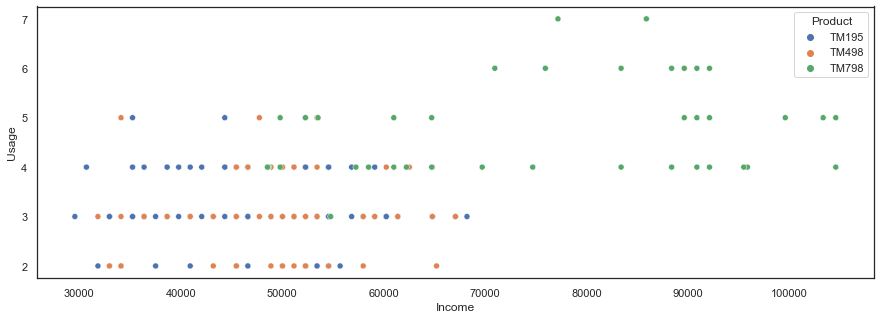

In [30]:
#Usage by income with product hue
plt.figure(figsize=(15,5))
sns.scatterplot(x='Income', y='Usage', hue='Product', data=cardioDF)

### As would be expected those with higher fitness expect to use the product 4 or more times a week
### The majority of TM798 product users expect to use the product 4 or more times a week
### Usage partially clustered for young adults & teens between 32k & 48k
### Usage partially clusteded for Adults between 50k & 65k
### Most usage above 3 are young adults
### Nearly all lower to mid income customers report usage of 4 and below 
### All higher income customers report usage of 4 and above
### The majority of TM798 product users have an income higher then 70k
### Only TM798 products are use by individuals with income higher then 70k
### The majority of individuals with income higher than 70k report a higher fitness (4 or 5)
### Usage gap between 70k and 85k

<AxesSubplot:xlabel='Income', ylabel='Age Group'>

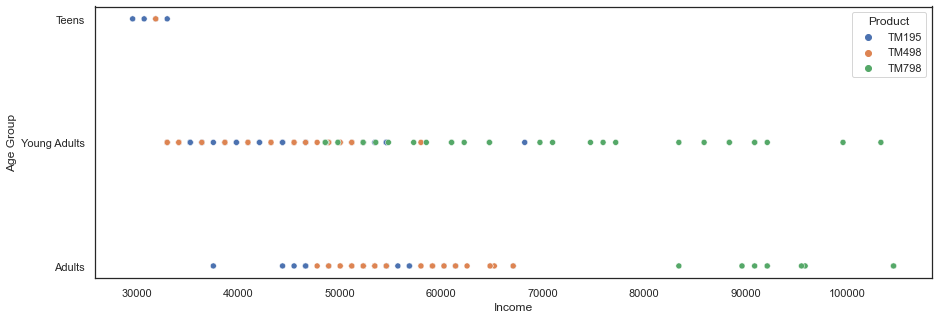

In [31]:
#Age group by income with product hue
plt.figure(figsize=(15,5))
sns.scatterplot(x='Income', y='Age Group', hue='Product', data=cardioDF)

### All Teens have an income below 40k, most use the TM195, none use the TM798
### The majority of Adults have an income between 45k and 70k and primarily use the TM498
### The vast majority of Young Adults with an income above 60k use the TM798
### There is a gap for Adults with an income below 45k and between 70k & 90k

<AxesSubplot:xlabel='Income', ylabel='Fitness'>

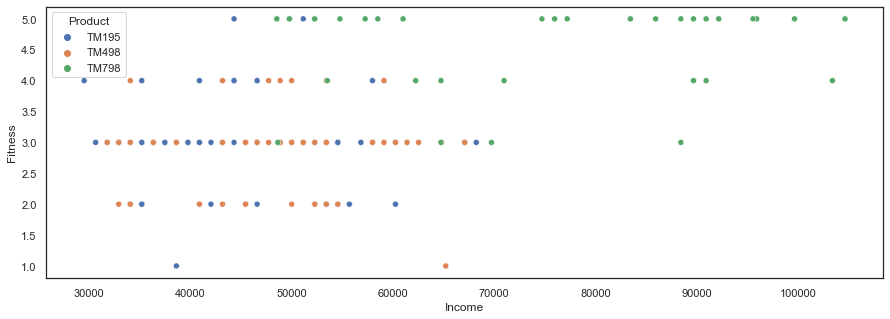

In [32]:
#fitness by income product hue
plt.figure(figsize=(15,5))
sns.scatterplot(x='Income', y='Fitness', data=cardioDF, hue="Product")

### Very few TM798 users report a fitness below a 4 with the majority reporting a 5
### Most TM498 users report a fitness of 3 or 4


<AxesSubplot:xlabel='Age Group', ylabel='Fitness'>

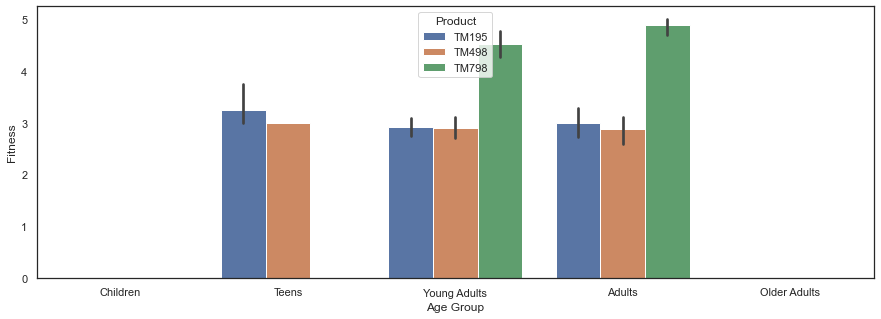

In [33]:
#Fitness by age group with product hue
plt.figure(figsize=(15,5))
sns.barplot(x='Age Group', y='Fitness', hue='Product', data=cardioDF)


### Fitness among age groups and products are roughly the same
### Fitness for TM798 Customers is about 30% to 40% more than other products

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

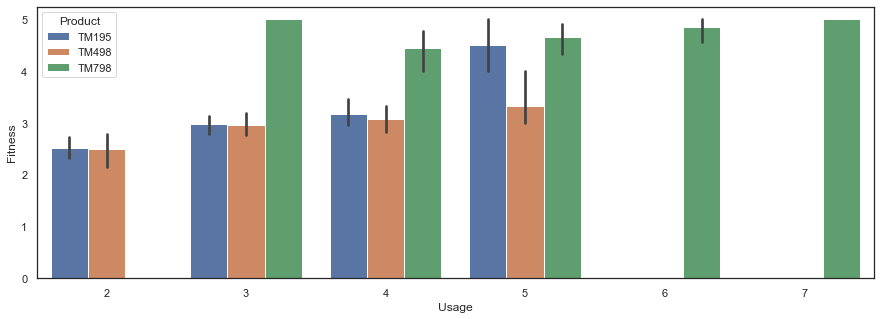

In [34]:
# Fitness by usage with product hue
plt.figure(figsize=(15,5))
sns.barplot(x='Usage', y='Fitness', hue='Product', data=cardioDF)

# There are no purchases for 795 below a usage of 3
# Fitness for 798 customers is roughly equal for usage above 2 
# Those who purchase the 798 all report high fitness, mostly 5 
#       (798 additional features may primarily be attractive to fitness enthuasists)
# TM195 customers with a usage of 5 is about 25% to 50% higher than for other usages
# Fitness for 195 & 498 are roughly even excpt for usage of 5 where 195 is about 25% higher
# 498 seems to appeal to customers with primarily mid range fitness 


### There are no purchases for 795 below a usage of 3
### Fitness for 798 customers is roughly equal for usage above 2 
### Those who purchase the 798 all report high fitness, mostly 5 
###      (798 additional features may primarily be attractive to fitness enthuasists)
### TM195 customers with a usage of 5 is about 25% to 50% higher than for other usages
### Fitness for 195 & 498 are roughly even excpt for usage of 5 where 195 is about 25% higher
### 498 seems to appeal to customers with primarily mid range fitness 

<AxesSubplot:xlabel='Fitness', ylabel='Product'>

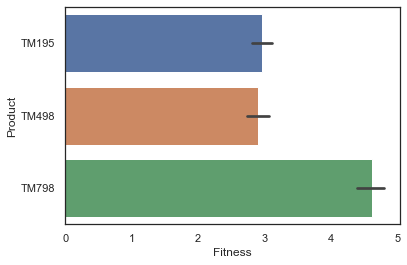

In [35]:
#fitness by product 
sns.barplot(x='Fitness', y='Product', data=cardioDF)

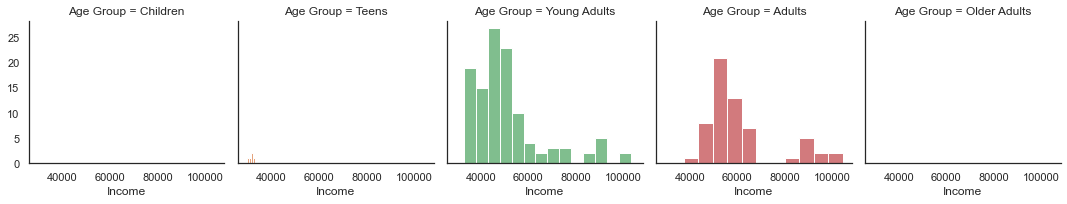

In [36]:
#income by age group
g = sns.FacetGrid(cardioDF, col="Age Group", hue="Age Group")
g.map(sns.histplot, "Income", fill=True)

<AxesSubplot:xlabel='Income', ylabel='Density'>

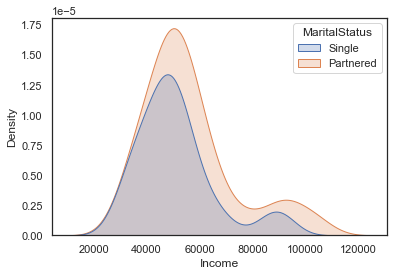

In [37]:
#Marital Status income distributions
#fig, ax =plt.subplots(1,2)
sns.kdeplot(x='Income', hue='MaritalStatus', fill=True, data=cardioDF)
#sns.kdeplot(x='Age', hue='Product', fill=True, data=cardioDF, ax=ax[1])

### Partnered customers earn more income starting around 35k

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


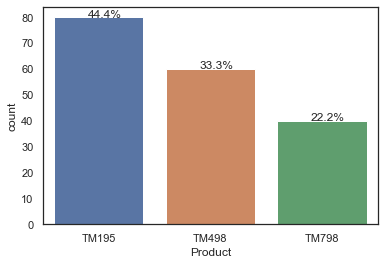

In [38]:
# -- Determine the frequency and distribution of products
print(cardioDF.Product.value_counts())
prodPercent = cardioDF.Product.value_counts(lambda x: x / float(x.sum()))
prodPercent = prodPercent * 100
ax = sns.countplot(cardioDF['Product'])
for idx,p in enumerate(ax.patches):
        ax.annotate(f'{prodPercent[idx]:.1f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
    

### TM195 produces the most sales with 44%
### TM498 accounts for 33% of sales
### TM798 accounts for 22% of sales

<AxesSubplot:xlabel='Income', ylabel='Product'>

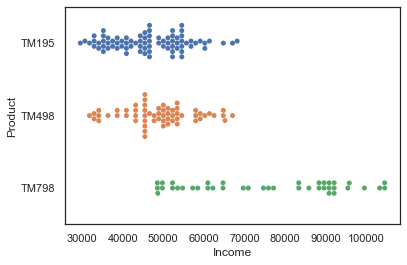

In [39]:
sns.swarmplot(x=cardioDF.Income, y=cardioDF.Product)

<AxesSubplot:xlabel='Income', ylabel='Density'>

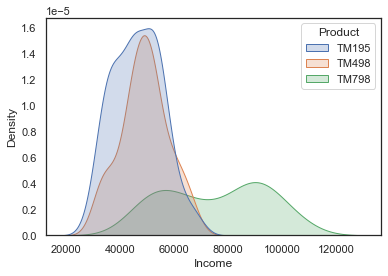

In [40]:
sns.kdeplot(x='Income', hue='Product', fill=True, data=cardioDF)



### TM798 - while this model has sales across most incomes and accounts for 22% of all sales
###       it is the only model that has higher income customers, starting around 70k
### TM195 - has 44% of sales and is primarily purchased by customers in the lower to mid income ranges.  
###       most sales around 30k to 60k earning customers
### TM498 - has 33% of sales with most of it's purchases by customers with incomes in the 40k to 65k range
### TM195 and TM498 have a significant overlap for customers with customers with incomes in the 20k to 70k range 

### TODO Need to determine if there are characteristic differences for TM 195 & 495.
### TODO Need to create a profile for TM798 customers
### TODO Determine if income is the only significant difference for TM798 purchases


<AxesSubplot:xlabel='Income', ylabel='Density'>

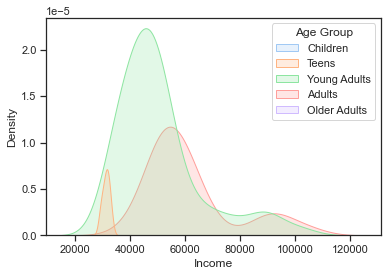

In [41]:
sns.set(style="ticks", palette="pastel")
sns.kdeplot(x='Income', hue='Age Group', fill=True, data=cardioDF)

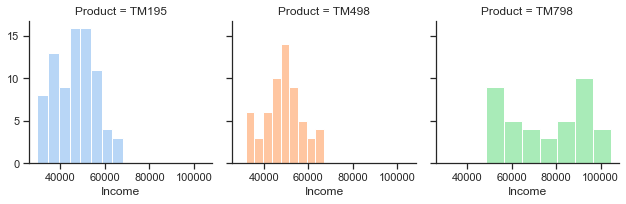

In [42]:
g = sns.FacetGrid(cardioDF, col="Product", hue="Product")
g.map(sns.histplot, "Income", fill=True)

In [43]:
# Who are the customers purchasing products?
tm195Customers = cardioDF[cardioDF['Product'] == 'TM195']
tm498Customers = cardioDF[cardioDF['Product'] == 'TM498']
tm798Customers = cardioDF[cardioDF['Product'] == 'TM798']
tm798Customers.head(2)
                          

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
140   TM798   22   Male         14        Single      4        3   48658   
141   TM798   22   Male         16        Single      3        5   54781   

     Miles     Age Group  
140    106  Young Adults  
141    120  Young Adults

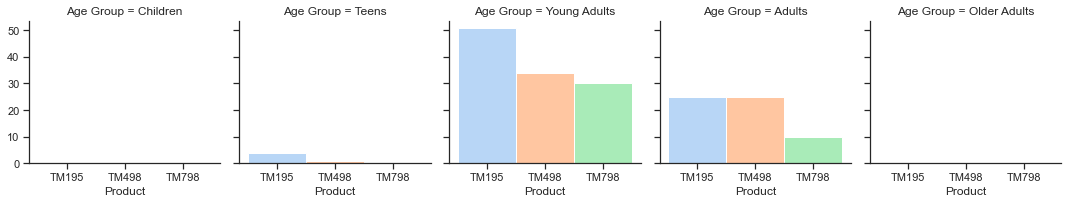

In [44]:
#Product by age group
g = sns.FacetGrid(cardioDF, col="Age Group", hue="Product")
g.map(sns.histplot, "Product", fill=True)



### Sales to Young Adults are higher across all products
### Sales of TM195 are about 50% higher for young adults than Adults
### Sales of TM498 are about 10% higher for young adults than Adults
### Sales of TM798 are about 75% higher for Young Adults than Adults

<AxesSubplot:xlabel='Income', ylabel='Density'>

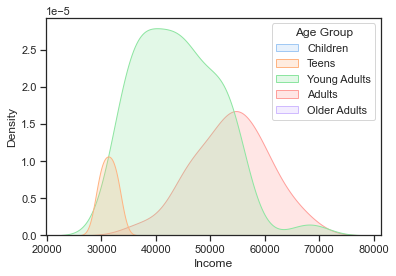

In [45]:
# TM195 income distribution by age group

sns.kdeplot(x='Income', hue='Age Group', fill=True, data=tm195Customers)


## RECOMMEND increase marketing to adults < 45k 

<AxesSubplot:xlabel='Income', ylabel='Density'>

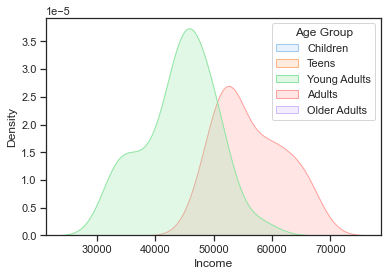

In [46]:
# TM498 income distribution by age group
sns.kdeplot(x='Income', hue='Age Group', fill=True, data=tm498Customers)

<AxesSubplot:xlabel='Income', ylabel='Density'>

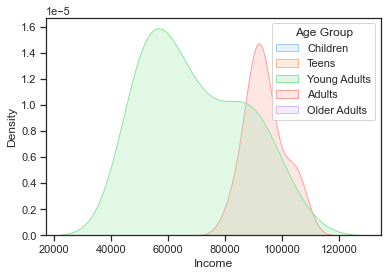

In [47]:
# TM798 income distribution by age group
sns.kdeplot(x='Income', hue='Age Group', fill=True, data=tm798Customers)


## RECOMMEND - Increase marketing to adults with higher incomes > 50k for the 798

<AxesSubplot:xlabel='Gender', ylabel='count'>

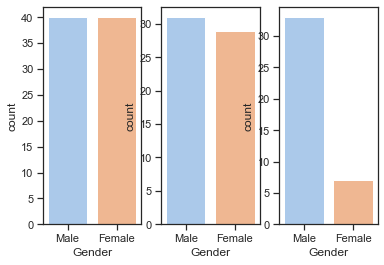

In [48]:
# Gender by product
fig, ax =plt.subplots(1,3)
sns.countplot(tm195Customers.Gender, ax=ax[0])
sns.countplot(tm498Customers.Gender, ax=ax[1])
sns.countplot(tm798Customers.Gender, ax=ax[2])

### Genders for the 195 and 495 customers are primarily equal
### Gender for the 798 is 82% male

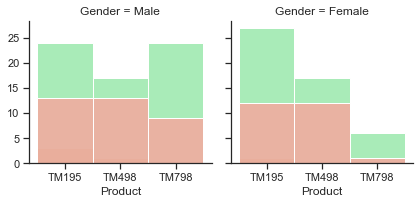

In [49]:
# Gender on all products with age group hue (green = young adults)
g = sns.FacetGrid(cardioDF, col="Gender", hue="Age Group")
g.map(sns.histplot, "Product", fill=True)

## Recommend - increase marketing of the TM798 to female fitness enthuasists 

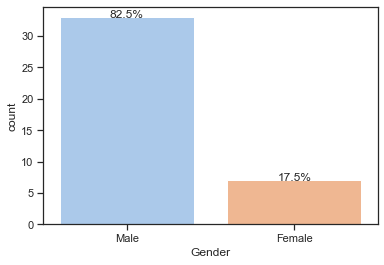

In [50]:
#gender on TM798
g798Percent = tm798Customers.Gender.value_counts(lambda x: x / float(x.sum()))
g798Percent = g798Percent * 100
ax = sns.countplot(tm798Customers.Gender)
for idx,p in enumerate(ax.patches):
        ax.annotate(f'{g798Percent[idx]:.1f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

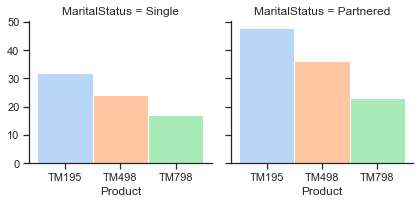

In [51]:
# Product Marrital Status
g = sns.FacetGrid(cardioDF, col="MaritalStatus", hue="Product")
g.map(sns.histplot, "Product", fill=True)

### More custoemers are partnered across all 3 products by about the same amount

# Product customer profiles
## See notes at beginning of notebook

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

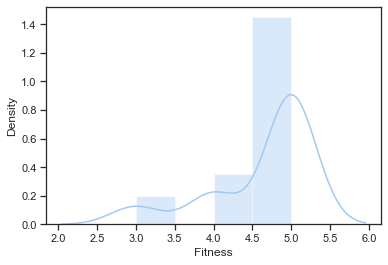

In [52]:
#fitness for 798 customers
sns.distplot(tm798Customers.Fitness)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

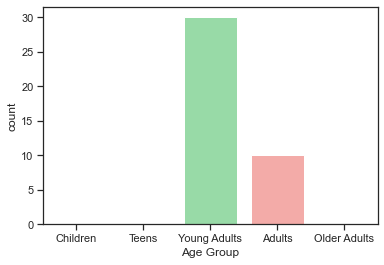

In [53]:
#TM798 age groups
sns.countplot(tm798Customers['Age Group'])


Young Adults    63.75
Adults          31.25
Teens            5.00
Older Adults     0.00
Children         0.00
Name: Age Group, dtype: float64


<AxesSubplot:xlabel='Age Group', ylabel='count'>

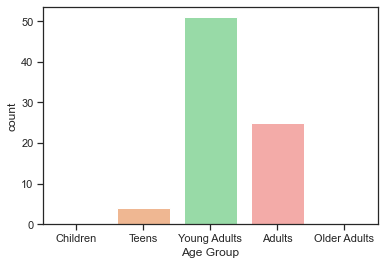

In [54]:
#TM198 age groups
ag195Percent = tm195Customers['Age Group'].value_counts(lambda x: x / float(x.sum()))
ag195Percent = ag195Percent * 100
print(ag195Percent)
sns.countplot(tm195Customers['Age Group'])


Young Adults    56.666667
Adults          41.666667
Teens            1.666667
Older Adults     0.000000
Children         0.000000
Name: Age Group, dtype: float64


<AxesSubplot:xlabel='Age Group', ylabel='count'>

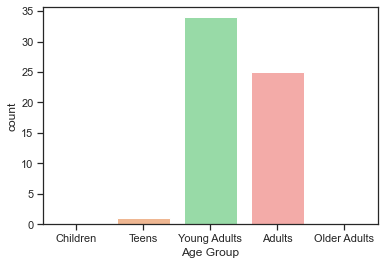

In [55]:
#TM498 age groups
ag498Percent = tm498Customers['Age Group'].value_counts(lambda x: x / float(x.sum()))
ag498Percent = ag498Percent * 100
print(ag498Percent)
sns.countplot(tm498Customers['Age Group'])

4    45.0
5    30.0
6    17.5
7     5.0
3     2.5
Name: Usage, dtype: float64


<AxesSubplot:xlabel='Usage', ylabel='count'>

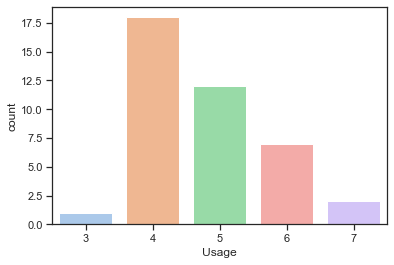

In [56]:
#TM798 usage
u798Percent = tm798Customers.Usage.value_counts(lambda x: x / float(x.sum()))
u798Percent = u798Percent * 100
print(u798Percent)
sns.countplot(tm798Customers['Usage'])

3    51.666667
2    23.333333
4    20.000000
5     5.000000
Name: Usage, dtype: float64


<AxesSubplot:xlabel='Usage', ylabel='count'>

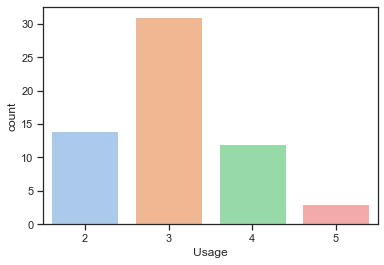

In [57]:
#TM498 usage
u498Percent = tm498Customers.Usage.value_counts(lambda x: x / float(x.sum()))
u498Percent = u498Percent * 100
print(u498Percent)
sns.countplot(tm498Customers['Usage'])

3    46.25
4    27.50
2    23.75
5     2.50
Name: Usage, dtype: float64


<AxesSubplot:xlabel='Usage', ylabel='count'>

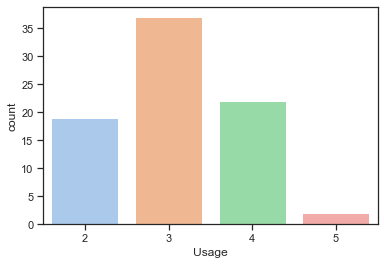

In [58]:
#TM195 usage
u195Percent = tm195Customers.Usage.value_counts(lambda x: x / float(x.sum()))
u195Percent = u195Percent * 100
print(u195Percent)
sns.countplot(tm195Customers['Usage'])

<AxesSubplot:xlabel='Fitness', ylabel='Density'>

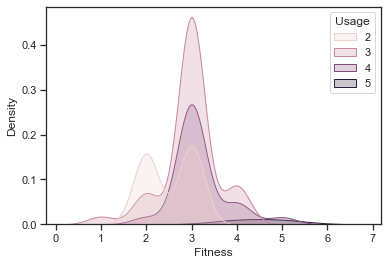

In [59]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(flatui)
sns.set(style="ticks", palette=flatui)

sns.kdeplot(x='Fitness', hue='Usage', fill=True, data=tm195Customers)

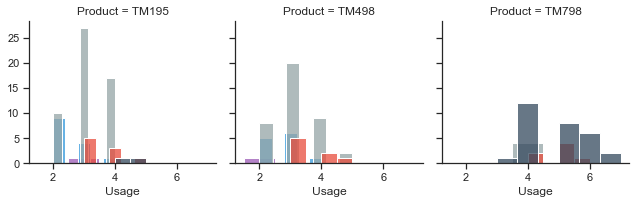

In [60]:
g = sns.FacetGrid(cardioDF, col="Product", hue="Fitness")
g.map(sns.histplot, "Usage", fill=True)

18    47.5
16    37.5
21     7.5
14     5.0
20     2.5
Name: Education, dtype: float64


<AxesSubplot:xlabel='Education', ylabel='count'>

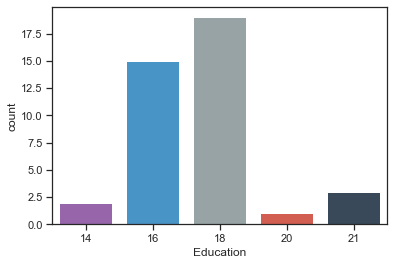

In [61]:
#TM798 education
e798Percent = tm798Customers.Education.value_counts(lambda x: x / float(x.sum()))
e798Percent = e798Percent * 100
print(e798Percent)
sns.countplot(tm798Customers['Education'])

16    51.666667
14    38.333333
18     3.333333
13     3.333333
15     1.666667
12     1.666667
Name: Education, dtype: float64


<AxesSubplot:xlabel='Education', ylabel='count'>

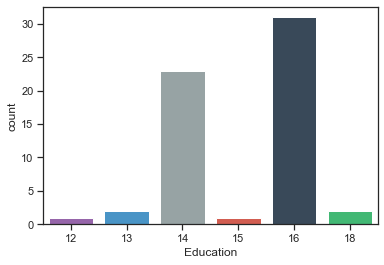

In [62]:
#TM498 education
e498Percent = tm498Customers.Education.value_counts(lambda x: x / float(x.sum()))
e498Percent = e498Percent * 100
print(e498Percent)
sns.countplot(tm498Customers['Education'])

In [63]:
# TM798 Mean income
print(tm798Customers.Income.mean())
print(tm195Customers.Income.mean())
print(tm498Customers.Income.mean())

75441.575
46418.025
48973.65


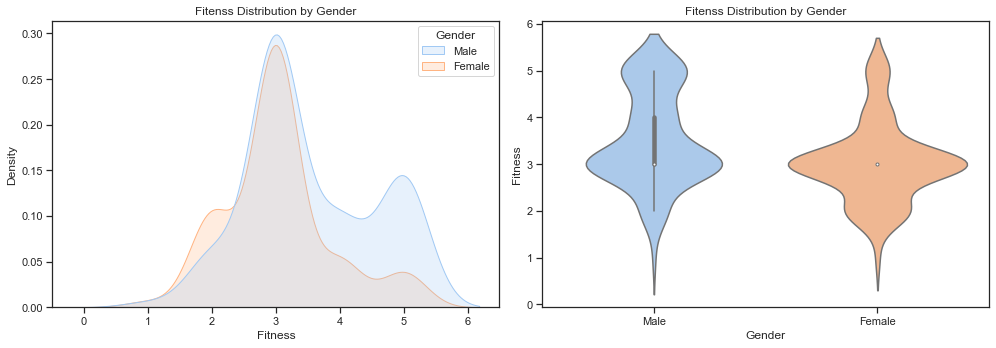

In [64]:
#Fitness distribution by gender
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Fitenss Distribution by Gender")
ax[0].set_title("Fitenss Distribution by Gender")
sns.violinplot('Gender','Fitness', ax=ax[1],data=cardioDF[(cardioDF.Gender=='Male')|
                                                                   (cardioDF.Gender=='Female')],split=True)
sns.kdeplot(x='Fitness', hue='Gender', ax=ax[0], fill=True, data=cardioDF)
plt.tight_layout()

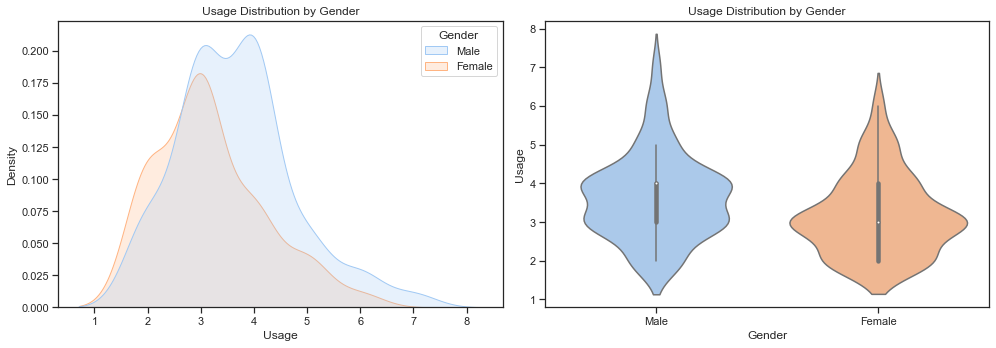

In [65]:
# Usage distribution by gender
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Usage Distribution by Gender")
ax[0].set_title("Usage Distribution by Gender")
sns.violinplot('Gender','Usage',ax=ax[1],data=cardioDF[(cardioDF.Gender=='Male')|
                                                                   (cardioDF.Gender=='Female')])
sns.kdeplot(x='Usage', hue='Gender', ax=ax[0],fill=True, data=cardioDF)
plt.tight_layout()

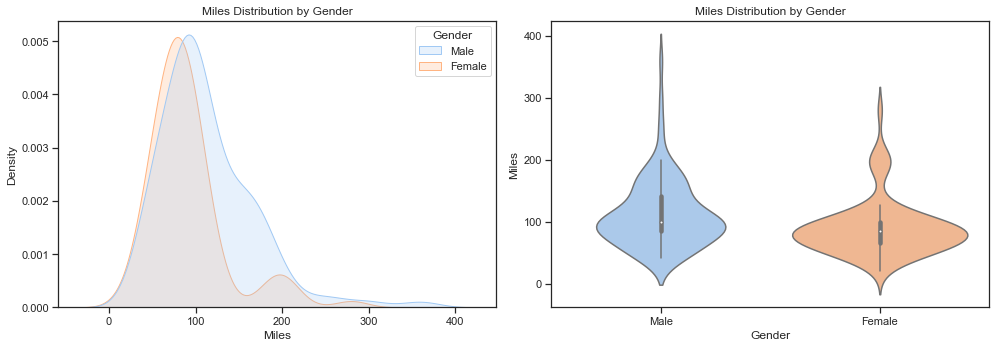

In [66]:
# Miles distribution by gender
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Miles Distribution by Gender")
ax[0].set_title("Miles Distribution by Gender")
sns.violinplot('Gender','Miles',ax=ax[1],data=cardioDF[(cardioDF.Gender=='Male')|
                                                                   (cardioDF.Gender=='Female')])
sns.kdeplot(x='Miles', hue='Gender', ax=ax[0],fill=True, data=cardioDF)
plt.tight_layout()

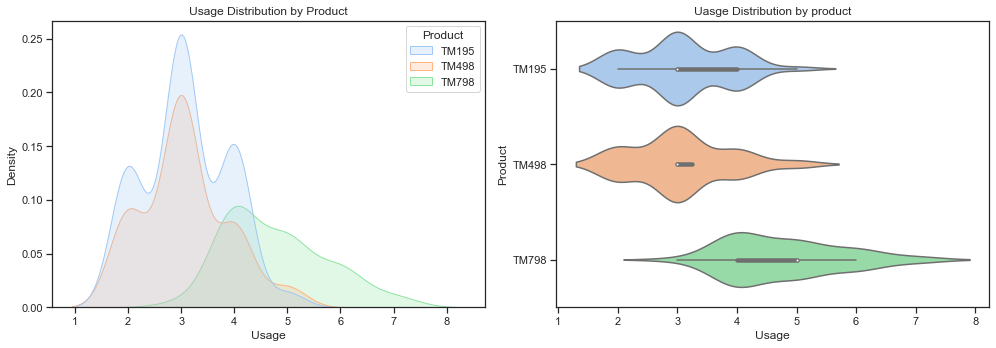

In [67]:
# Usage distribution by product
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Uasge Distribution by product")
ax[0].set_title("Usage Distribution by Product")
sns.kdeplot(x='Usage', hue='Product', fill=True, data=cardioDF, ax=ax[0])
sns.violinplot('Usage','Product',data=cardioDF, ax=ax[1])
plt.tight_layout()

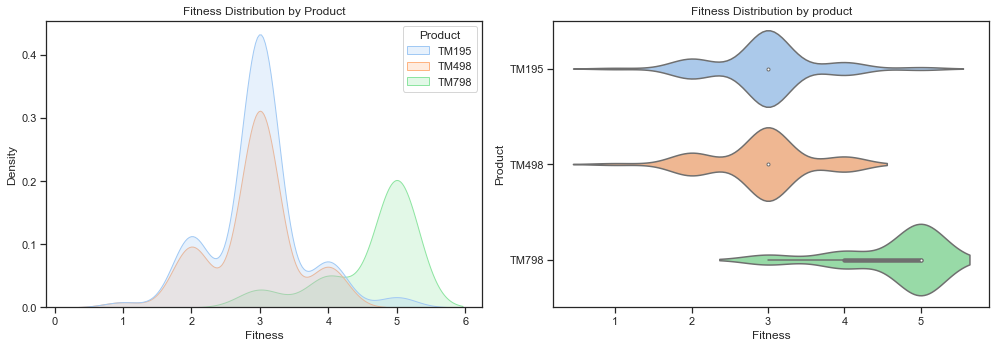

In [68]:
#Fitness distribution by product
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Fitness Distribution by product")
ax[0].set_title("Fitness Distribution by Product")
sns.kdeplot(x='Fitness', hue='Product', fill=True, data=cardioDF, ax=ax[0])
sns.violinplot('Fitness','Product',data=cardioDF, ax=ax[1])
plt.tight_layout()

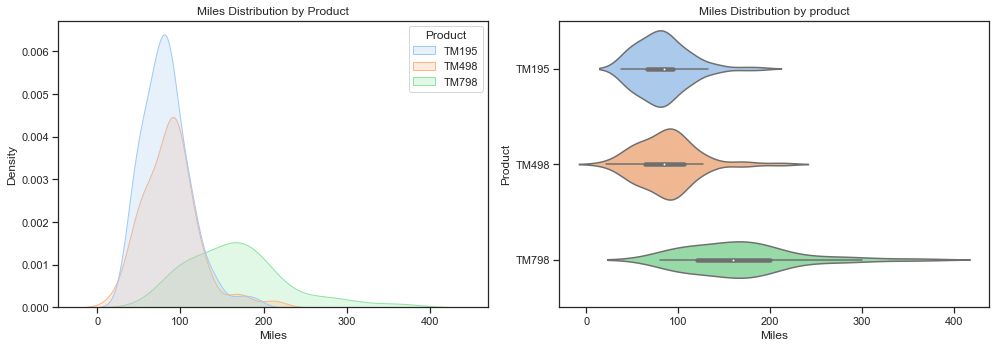

In [69]:
# Miles Distribution by Product
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[1].set_title("Miles Distribution by product")
ax[0].set_title("Miles Distribution by Product")
sns.kdeplot(x='Miles', hue='Product', fill=True, data=cardioDF, ax=ax[0])
sns.violinplot('Miles','Product',data=cardioDF, ax=ax[1])
plt.tight_layout()

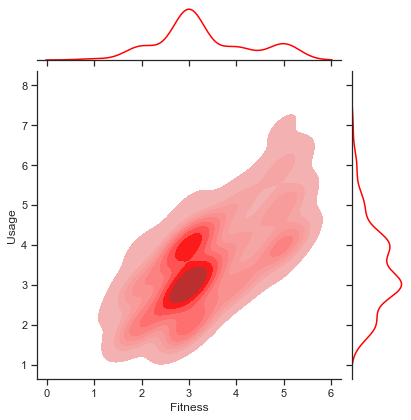

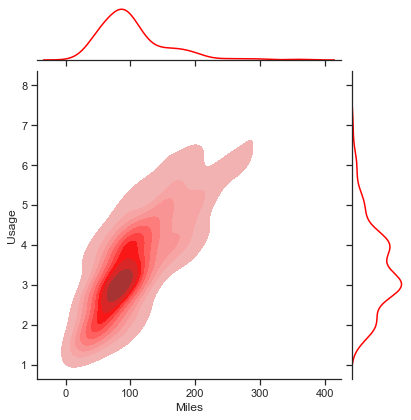

In [70]:
#Fitness and Miles distribution by usage
sns.jointplot(x=cardioDF["Fitness"],y=cardioDF["Usage"],kind="kde",color="red",shade="dark")
sns.jointplot(x=cardioDF["Miles"],y=cardioDF["Usage"],kind="kde",color="red",shade="dark")

In [71]:
from pandas_profiling import ProfileReport
prof = ProfileReport(cardioDF)
prof